<a href="https://colab.research.google.com/github/MatheusAraripe/MatheusAraripe/blob/main/sumarizacao.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#library to get a text from the internet
!pip install goose3 -q

     |████████████████████████████████| 87 kB 1.9 MB/s 
     |████████████████████████████████| 981 kB 29.1 MB/s 


Importação das bibliotecas para trabalhar com expressões e linguagem natural


In [ ]:
import nltk
import re
import string
import heapq
from goose3 import Goose
from IPython.core.display import HTML

In [ ]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [ ]:
nltk.download("stopwords")

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

# Teste de um texto retirado da internet 

In [ ]:
g = Goose()
url = "your_url"
artigo_internet = g.extract(url)
artigo_internet.infos

In [ ]:
txt = artigo_internet.cleaned_text

In [ ]:
def format(txt):
  txt = re.sub (r'\s', ' ', txt)
  txt = txt.lower()
  tokens = []
  vicios = ['né', 'Então', 'então', 'gente', 'Né']
  stopwords = nltk.corpus.stopwords.words("portuguese") + vicios
  for i in nltk.word_tokenize(txt):
    if i not in stopwords and i not in string.punctuation:
          tokens.append(i)
  texto_formatado = " ".join(elemento for elemento in tokens if not elemento.isdigit())
  return texto_formatado

In [ ]:
def sumarizar(txt, quant_sentencas):
  texto_format = format(txt)
  freq_palavras = nltk.FreqDist(nltk.word_tokenize(texto_format))
  freq_max  = max(freq_palavras.values())
  for palavra in freq_palavras:
    freq_palavras[palavra] = freq_palavras[palavra]/freq_max


  sentencas_txt = nltk.sent_tokenize(txt)

  nota_sentenca = {}
  for sentenca in sentencas_txt:
    for palavra in nltk.word_tokenize(sentenca):
      if palavra in freq_palavras.keys():
        if sentenca not in nota_sentenca:
          nota_sentenca[sentenca] = freq_palavras[palavra]
        else:
          nota_sentenca[sentenca] += freq_palavras[palavra]



  melhores_sentencas = heapq.nlargest(quant_sentencas, nota_sentenca, key = nota_sentenca.get)
  resumo = " ".join(melhores_sentencas)
  


  texto = ""
  display(HTML(f'<h1>Resumo do texto</h1>'))
  for sentenca in sentencas_txt:
    if sentenca in melhores_sentencas:
      texto += sentenca.replace(sentenca, f'<mark>{sentenca}</mark>')
    else:
      texto += sentenca 
  return display(HTML(f"""{texto}"""))
   



In [ ]:
sumarizar(txt,4)

In [ ]:
!pip install wordcloud -q
from IPython.core.pylabtools import figsize
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import matplotlib.pyplot as plt
from PIL import Image
import numpy as np
import pandas as pd

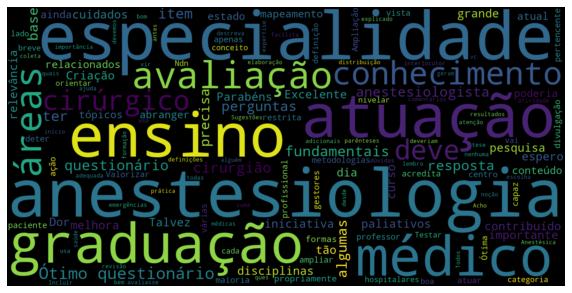

In [ ]:
from IPython.core.pylabtools import figsize
stopwords = nltk.corpus.stopwords.words("portuguese")
wordcloud = WordCloud(stopwords = stopwords, background_color = "black", width = 1600, height = 800).generate(texto)
fig, ax = plt.subplots(figsize = (10,6))
plt.imshow(wordcloud, interpolation= "bilinear")
ax.set_axis_off()

In [ ]:
wordcloud.to_file("nuvem_palavras2.png")

# **Lematizaçao**

In [ ]:
import spacy
!python -m spacy download pt_core_news_sm

In [ ]:
pln = spacy.load("pt_core_news_sm")

In [ ]:
stopwords = nltk.corpus.stopwords.words("portuguese")

In [ ]:
def format_lemma(txt):
  txt = re.sub (r'\s', ' ', txt)
  txt = txt.replace("\\n\\n", " ")
  txt = txt.lower()
  documento = pln(txt)
  tokens = []
  vicios = ['né', 'Então', 'então', 'gente']
  stopwords = nltk.corpus.stopwords.words("portuguese") + vicios
  for i in documento:
    if i.text not in stopwords and i.text not in string.punctuation:
      tokens.append(i.lemma_)
  texto_formatado = " ".join(elemento for elemento in tokens if not elemento.isdigit())
  return texto_formatado

In [ ]:
def sumarizar_lemma(txt, quant_sentencas):
  txt = txt.replace("\\n\\n", " ")
  texto_format = format_lemma(txt)
  freq_palavras = nltk.FreqDist(nltk.word_tokenize(texto_format))
  freq_max  = max(freq_palavras.values())
  for palavra in freq_palavras:
    freq_palavras[palavra] = freq_palavras[palavra]/freq_max


  sentencas_txt = nltk.sent_tokenize(txt)

  nota_sentenca = {}
  for sentenca in sentencas_txt:
    for palavra in nltk.word_tokenize(sentenca):
      if palavra in freq_palavras.keys():
        if sentenca not in nota_sentenca:
          nota_sentenca[sentenca] = freq_palavras[palavra]
        else:
          nota_sentenca[sentenca] += freq_palavras[palavra]



  melhores_sentencas = heapq.nlargest(quant_sentencas, nota_sentenca, key = nota_sentenca.get)
  
  resumo = ""
  for sentenca in sentencas_txt:
    if sentenca in melhores_sentencas:
      resumo += sentenca


  texto = ""
  display(HTML(f'<h1>Resumo do texto</h1>'))
  for sentenca in sentencas_txt:
    if sentenca in melhores_sentencas:
      texto += sentenca.replace(sentenca, f'<mark>{sentenca}</mark>')
    else:
      texto += sentenca 
  return display(HTML(f"""{texto}""")), resumo
